<a href="https://colab.research.google.com/github/RaghulJ06/DSAI/blob/main/PCA_Feature_Engineering_Bank_Customer_Churn_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA & Feature Engineering

- Bank Customer Churn Dataset

In [ ]:
# pip install pandas numpy scikit-learn

### Step 1: Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Step 2: Load the dataset


In [ ]:
data = pd.read_csv("/content/bank_customer_churn.csv")

### Step 3: Data Preprocessing


In [ ]:
# Drop unnecessary columns (e.g., customer ID, row number, surname)
data = data.drop(columns=["RowNumber", "CustomerId", "Surname"])

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Step 4: Handle Categorical Variables (e.g., one-hot encoding)

In [ ]:
data = pd.get_dummies(data, columns=["Geography", "Gender"], drop_first=True)


In [ ]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


### Step 5: Data Visualization (Optional)

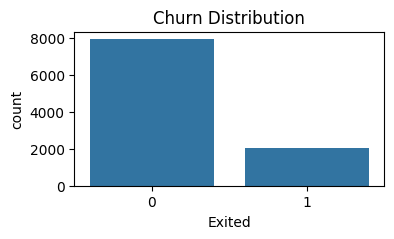

In [ ]:
plt.figure(figsize=(4, 2))
sns.countplot(x='Exited', data=data)
plt.title('Churn Distribution')
plt.show()

### Step 6: Split the dataset into features (X) and target (y)

In [ ]:
X = data.drop(columns=["Exited"])
y = data["Exited"]

### Step 7: Standardize the data

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Step 8: Dimensionality Reduction using PCA

In [ ]:
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

### Step 9: Feature Engineering (Example: SelectKBest using ANOVA F-statistic)

In [ ]:
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X_scaled, y)

### Step 10: Train-test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

### Step 11: Train a Model (Random Forest, for example)

In [ ]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Step 12: Evaluate the Model

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.86
